In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("occupation.XLSX",sheet_name="Table 1.7", header=1, skiprows=[2],skip_footer=4,na_values=["Summary","—"])

In [3]:
df.drop(columns=['Unnamed: 1', 'Employment Change, 2016-26', 'Unnamed: 6','Percent self employed, 2016',
                 'Work experience in a related occupation','Typical on-the-job training needed to attain competency in the occupation'],inplace=True)

In [4]:
df.rename(columns={'2016 National Employment Matrix title and code':'Jobs','Occupation\ntype':'Occupation_Type','Employment':'Employment_2016','Unnamed: 4':'Employment_2026','Occupational openings, 2016-26 annual average':'Job_Openings','Median annual wage, 2017(1)':'2017_Median_Wage','Typical education needed for entry':'Education_Level'},inplace=True)

In [5]:
df = df.dropna(subset = ['Education_Level'])

In [6]:
df.Education_Level.value_counts()

High school diploma or equivalent    340
Bachelor's degree                    174
No formal educational credential     104
Doctoral or professional degree       63
Associate's degree                    48
Postsecondary nondegree award         46
Master's degree                       38
Some college, no degree                5
Name: Education_Level, dtype: int64

In [7]:
degrees_employment_2016 = df.groupby('Education_Level')['Employment_2016'].sum()

In [8]:
degrees_employment_2026 = df.groupby('Education_Level')['Employment_2026'].sum()

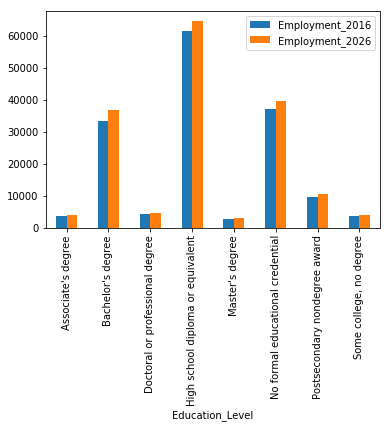

In [9]:
pd.concat([degrees_employment_2016, degrees_employment_2026],axis=1).plot(kind='bar',sharex=False)

In [10]:
df = pd.concat([degrees_employment_2016, degrees_employment_2026],axis=1)

In [11]:
df

,Employment_2016,Employment_2026
Education_Level,,
Associate's degree,3617.8,4014.5
Bachelor's degree,33371.9,36747.9
Doctoral or professional degree,4230.9,4786.8
High school diploma or equivalent,61504.3,64644.2
Master's degree,2670.6,3117.7
No formal educational credential,37199.4,39572.4
Postsecondary nondegree award,9582.8,10647.0
"Some college, no degree",3858.5,4020.5


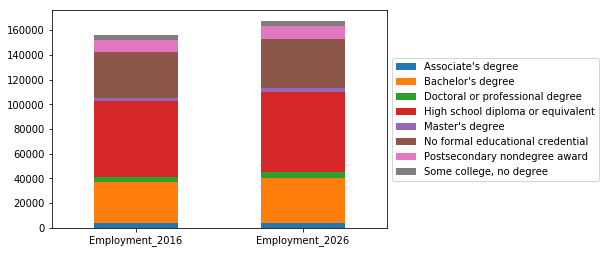

In [12]:
df.transpose().plot.bar(stacked=True, sort_columns=True, rot=0).legend(loc="center left", bbox_to_anchor=(1,0.5))

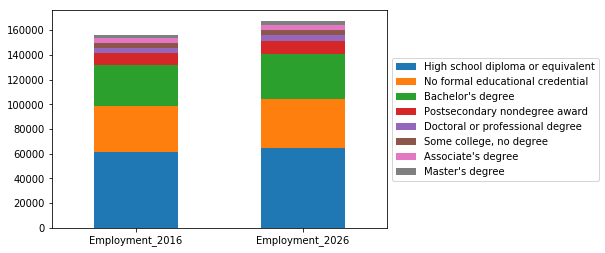

In [13]:
df.sort_values(by='Employment_2016', ascending=False).transpose().plot.bar(stacked=True, sort_columns=True, rot=0).legend(loc="center left", bbox_to_anchor=(1,0.5))

In [95]:
df


,Employment_2016,Employment_2026
Education_Level,,
Associate's degree,3617.8,4014.5
Bachelor's degree,33371.9,36747.9
Doctoral or professional degree,4230.9,4786.8
High school diploma or equivalent,61504.3,64644.2
Master's degree,2670.6,3117.7
No formal educational credential,37199.4,39572.4
Postsecondary nondegree award,9582.8,10647.0
"Some college, no degree",3858.5,4020.5
